## Greenhouse Gas Emissions

#### Set Up the Environment


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from statsmodels.tsa.arima_model import ARIMA
import geopandas as gpd

# Load the data
data = pd.read_csv('Emission_Dataset.csv')


#### Descriptive Analysis

In [4]:
# Summarize GHG emissions
summary = data.groupby(['sector', 'start_time']).agg({'emissions_quantity': ['mean', 'median', 'std']})
print(summary)

# Top contributors by sector
top_contributors = data.groupby('sector')['emissions_quantity'].sum().sort_values(ascending=False)
print(top_contributors)


                                emissions_quantity                           
                                              mean       median           std
sector      start_time                                                       
agriculture 2015-01-01 00:00:00       3.561518e+06  4147.200000  2.284986e+07
            2016-01-01 00:00:00       3.603999e+06  4068.701862  2.321010e+07
            2017-01-01 00:00:00       3.652225e+06  4081.038105  2.353265e+07
            2018-01-01 00:00:00       3.674266e+06  3903.453374  2.359557e+07
            2019-01-01 00:00:00       3.701405e+06  4063.365126  2.389988e+07
...                                            ...          ...           ...
waste       2018-01-01 00:00:00       1.173733e+05     0.000000  9.779612e+05
            2019-01-01 00:00:00       1.188088e+05     0.000000  1.020644e+06
            2020-01-01 00:00:00       1.201746e+05     0.000000  1.038932e+06
            2021-01-01 00:00:00       1.237795e+05     0.000000 

#### Trend Analysis

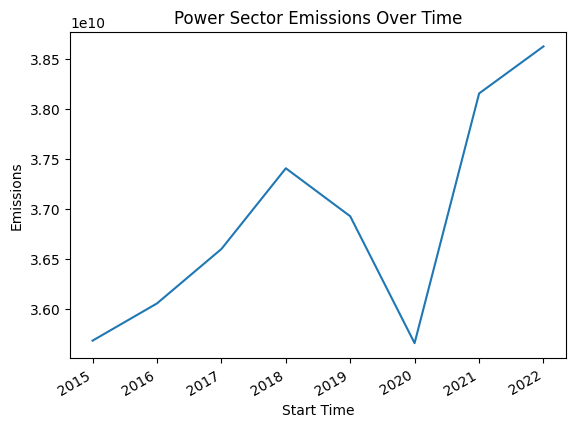

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Convert 'start_time' to datetime format
data['start_time'] = pd.to_datetime(data['start_time'])

# Trend analysis for a specific sector
sector_trend = data[data['sector'] == 'power'].groupby('start_time')['emissions_quantity'].sum()

# Plot the trend
plt.plot(sector_trend)

# Set title and labels
plt.title('Power Sector Emissions Over Time')
plt.xlabel('Start Time')
plt.ylabel('Emissions')

# Format the x-axis to show year only
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()


#### Comparative Analysis


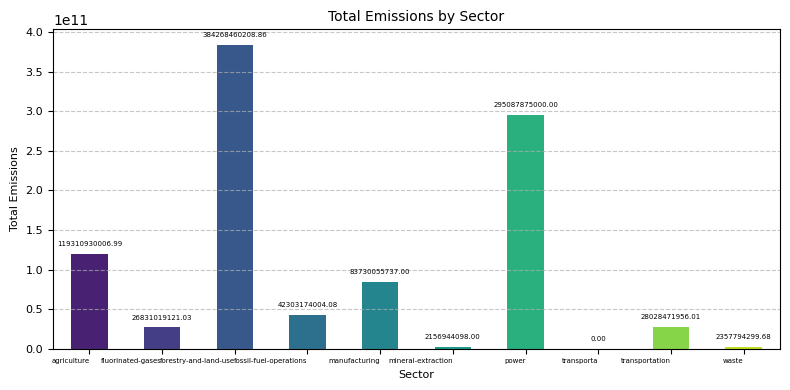

In [31]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Compare sectors
emissions_by_sector = data.groupby('sector')['emissions_quantity'].sum()

# Set the figure size (width, height)
plt.figure(figsize=(8, 4))

# Use a color palette
colors = sns.color_palette('viridis', len(emissions_by_sector))

# Plot the data
bars = emissions_by_sector.plot(kind='bar', color=colors)

# Set title and labels with increased font size
plt.title('Total Emissions by Sector', fontsize=10)
plt.xlabel('Sector', fontsize=8)
plt.ylabel('Total Emissions', fontsize=8)

# Add data labels on top of each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f'),
                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  xytext=(0, 5),  # 5 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=5)

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=360, ha='right', fontsize=5)
plt.yticks(fontsize=8)

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
